In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Set the path to the root folder containing category folders


E:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_dir = "C:\\Users\\JkL\\95891\\Project\\Images"

In [3]:
# Parameters
img_size = (224, 224)
batch_size = 32
epochs = 10

def load_images(folder_path):
    images = []
    labels = []
    label_dict = {}

    for label, category in enumerate(os.listdir(folder_path)):
        label_dict[label] = category
        category_path = os.path.join(folder_path, category)

        for filename in os.listdir(category_path):
            img_path = os.path.join(category_path, filename)

            # Add error handling to check if the image is successfully loaded
            try:
                img = cv2.imread(img_path)

                # Check if the image is empty
                if img is None:
                    print(f"Warning: Unable to read image at {img_path}")
                    continue

                img = cv2.resize(img, img_size)
                img = img / 255.0  # Normalize pixel values to be between 0 and 1
                images.append(img)
                labels.append(label)

            except Exception as e:
                print(f"Error processing image at {img_path}: {str(e)}")

    return np.array(images), np.array(labels), label_dict
# Load and preprocess images
images, labels, label_dict = load_images(data_dir)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [4]:
# Build a simple CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_dict), activation='softmax')
])



In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')




Epoch 1/10


127/127 [==============================] - 100s 764ms/step - loss: 2.6127 - accuracy: 0.2300 - val_loss: 2.4435 - val_accuracy: 0.2956
Epoch 2/10
127/127 [==============================] - 92s 725ms/step - loss: 2.2980 - accuracy: 0.3190 - val_loss: 2.2405 - val_accuracy: 0.3409
Epoch 3/10
127/127 [==============================] - 95s 745ms/step - loss: 1.9870 - accuracy: 0.3968 - val_loss: 2.0643 - val_accuracy: 0.3793
Epoch 4/10
127/127 [==============================] - 93s 736ms/step - loss: 1.5641 - accuracy: 0.5265 - val_loss: 2.3483 - val_accuracy: 0.3448
Epoch 5/10
127/127 [==============================] - 95s 745ms/step - loss: 0.9642 - accuracy: 0.7035 - val_loss: 2.5614 - val_accuracy: 0.3744
Epoch 6/10
127/127 [==============================] - 93s 736ms/step - loss: 0.5011 - accuracy: 0.8541 - val_loss: 3.4673 - val_accuracy: 0.3488
Epoch 7/10
127/127 [==============================] - 93s 730ms/step - loss: 0.2266 - accuracy: 0.9347 - val_loss: 4.3266 - va

In [6]:
# Make predictions on a few test data
predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 236ms/step


In [7]:

# Display the predicted labels and corresponding ground truth labels
for i in range(5):
    print(f"Predicted: {label_dict[predicted_labels[i]]}, Ground Truth: {label_dict[y_test[i]]}")


Predicted: Expressionism_images, Ground Truth: Cubism_images
Predicted: Post-Impressionism_images, Ground Truth: Post-Impressionism_images
Predicted: Impressionism_images, Ground Truth: Impressionism_images
Predicted: Post-Impressionism_images, Ground Truth: Post-Impressionism_images
Predicted: Mannerism_images, Ground Truth: Baroque_images


In [8]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

base_model = MobileNetV2(input_shape=(img_size[0], img_size[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(label_dict), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
127/127 [==============================] - 55s 391ms/step - loss: 1.9343 - accuracy: 0.4240 - val_loss: 1.5015 - val_accuracy: 0.5586
Epoch 2/10
127/127 [==============================] - 46s 364ms/step - loss: 1.2217 - accuracy: 0.6327 - val_loss: 1.3157 - val_accuracy: 0.6000
Epoch 3/10
127/127 [==============================] - 46s 363ms/step - loss: 0.9860 - accuracy: 0.7050 - val_loss: 1.2003 - val_accuracy: 0.6355
Epoch 4/10
127/127 [==============================] - 46s 362ms/step - loss: 0.8404 - accuracy: 0.7449 - val_loss: 1.1806 - val_accuracy: 0.6355
Epoch 5/10
127/127 [==============================] - 46s 365ms/step - loss: 0.7336 - accuracy: 0.7811 - val_loss: 1.1371 - val_accuracy: 0.6502
Epoch 6/10
127/127 [==============================] - 46s 361ms/step - loss: 0.6515 - accuracy: 0.8119 - val_loss: 1.1389 - val_accuracy: 0.6552
Epoch 7/10
127/127 [==============================] - 46s 360ms/step - loss: 0.5812 - accuracy: 0.8403 - val_loss: 1.1117 - val_ac

40/40 [==============================] - 12s 296ms/step - loss: 1.1665 - accuracy: 0.6430
Test accuracy: 0.6430259943008423
40/40 [==============================] - 13s 296ms/step
Confusion Matrix:
[[  2   0   0   0   0   0   0   0   0   0   0   1   2   0   0   1   0   0
    0   0]
 [  0  94   0   7   2   2   3   6   0   0   3   0   5   0   1   3  13   0
    2   0]
 [  0   0  13   3   0   0   0   1   0   0   1   0   0   0   0   0   1   0
    0   0]
 [  0   1   1  58   0   2   1   4   0   0   1   0   6   4   0   0   1   1
    0   0]
 [  0   3   0   6  15   0   1   3   0   0   2   0   4   0   0   0   1   0
    0   0]
 [  0   1   0   7   0  31   0   2   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   7   0   9   0   0  30   3   1   0   2   0   3   2   1   0   1   0
    2   3]
 [  0   8   0  10   1   0   3 198   1   1   3   0  32   2   0   0   6   0
    0   1]
 [  0   2   0   1   0   0   0   2  11   0   0   0   1   0   0   0   1   0
    0   1]
 [  0   0   1   0   0   0   0   3   0

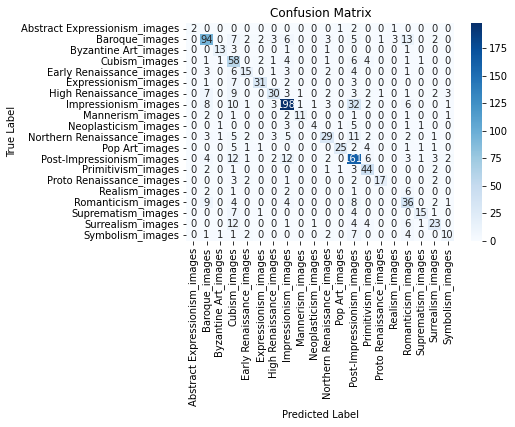

Classification Report:
                               precision    recall  f1-score   support

Abstract Expressionism_images       1.00      0.33      0.50         6
               Baroque_images       0.69      0.67      0.68       141
         Byzantine Art_images       0.76      0.68      0.72        19
                Cubism_images       0.38      0.72      0.50        80
     Early Renaissance_images       0.58      0.43      0.49        35
         Expressionism_images       0.84      0.70      0.77        44
      High Renaissance_images       0.70      0.47      0.56        64
         Impressionism_images       0.80      0.74      0.77       266
             Mannerism_images       0.85      0.58      0.69        19
         Neoplasticism_images       0.67      0.25      0.36        16
  Northern Renaissance_images       0.63      0.45      0.53        64
               Pop Art_images       0.89      0.61      0.72        41
    Post-Impressionism_images       0.61      0.77   

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=label_dict.values()))

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(input_shape=(img_size[0], img_size[1], 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(len(label_dict), activation='softmax')
])



58889256/58889256 [==============================] - 1s 0us/step


In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
127/127 [==============================] - 903s 7s/step - loss: 2.4690 - accuracy: 0.2453 - val_loss: 2.2948 - val_accuracy: 0.2956
Epoch 2/10
127/127 [==============================] - 906s 7s/step - loss: 2.1818 - accuracy: 0.3300 - val_loss: 2.1087 - val_accuracy: 0.3665
Epoch 3/10
127/127 [==============================] - 908s 7s/step - loss: 2.0249 - accuracy: 0.3983 - val_loss: 1.9961 - val_accuracy: 0.4286
Epoch 4/10
127/127 [==============================] - 897s 7s/step - loss: 1.9192 - accuracy: 0.4375 - val_loss: 1.9011 - val_accuracy: 0.4443
Epoch 5/10
127/127 [==============================] - 894s 7s/step - loss: 1.8315 - accuracy: 0.4701 - val_loss: 1.8371 - val_accuracy: 0.4601
Epoch 6/10
127/127 [==============================] - 894s 7s/step - loss: 1.7659 - accuracy: 0.4952 - val_loss: 1.7945 - val_accuracy: 0.4828
Epoch 7/10
127/127 [==============================] - 899s 7s/step - loss: 1.7089 - accuracy: 0.5088 - val_loss: 1.7603 - val_accuracy: 0.4837

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

40/40 [==============================] - 231s 6s/step - loss: 1.6609 - accuracy: 0.5028
Test accuracy: 0.5027580857276917
40/40 [==============================] - 226s 6s/step


Confusion Matrix:
[[  1   1   0   0   0   0   0   1   0   0   0   0   3   0   0   0   0   0
    0   0]
 [  0  92   0   0   0   1   1  25   0   0   3   2  16   0   1   0   0   0
    0   0]
 [  0   0   6   1   0   0   0   7   0   0   1   1   2   0   1   0   0   0
    0   0]
 [  0   3   0  38   0   5   0  12   0   0   0   0  16   4   1   0   1   0
    0   0]
 [  0   1   1   2   1   3   1   9   0   0   5   1   7   0   3   0   0   0
    0   1]
 [  0   4   0   1   0  29   0   7   0   0   0   1   1   0   0   0   0   0
    1   0]
 [  0  13   1   3   0   1   7  10   0   0   4   0  19   1   2   0   1   0
    0   2]
 [  0  13   0   1   0   3   0 217   0   0   2   0  28   0   1   0   1   0
    0   0]
 [  0   6   0   0   0   0   0   3   4   0   3   0   2   0   0   0   0   0
    0   1]
 [  0   1   1   2   0   0   0   3   0   1   0   2   6   0   0   0   0   0
    0   0]
 [  0   4   2   1   1   2   0  11   0   0  20   0  17   1   2   0   3   0
    0   0]
 [  0   5   0   6   0   0   0   0   0   0   0  

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


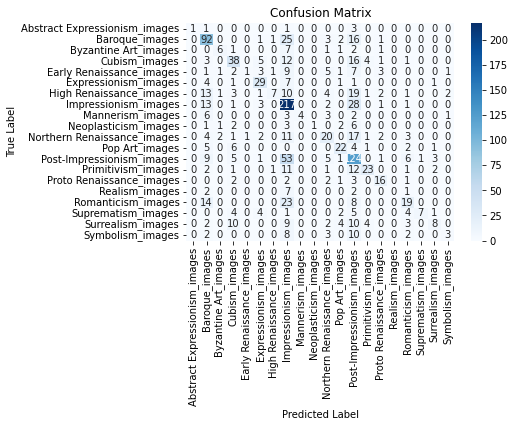


Classification Report:
                               precision    recall  f1-score   support

Abstract Expressionism_images       1.00      0.17      0.29         6
               Baroque_images       0.53      0.65      0.58       141
         Byzantine Art_images       0.55      0.32      0.40        19
                Cubism_images       0.49      0.47      0.48        80
     Early Renaissance_images       0.50      0.03      0.05        35
         Expressionism_images       0.59      0.66      0.62        44
      High Renaissance_images       0.70      0.11      0.19        64
         Impressionism_images       0.52      0.82      0.63       266
             Mannerism_images       1.00      0.21      0.35        19
         Neoplasticism_images       1.00      0.06      0.12        16
  Northern Renaissance_images       0.39      0.31      0.35        64
               Pop Art_images       0.59      0.54      0.56        41
    Post-Impressionism_images       0.42      0.59  

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate precision, recall, and F1-score for each class
class_metrics = classification_report(y_test, predicted_labels, target_names=label_dict.values(), output_dict=True)

# Print accuracy for each class
print("\nAccuracy for Each Class:")
for label, metrics in class_metrics.items():
    if label not in label_dict.values():
        continue
    accuracy = metrics['precision']
    print(f"{label}: {accuracy * 100:.2f}%")

# Display the confusion matrix using a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predicted_labels, target_names=label_dict.values()))